In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv("..\\..\\data\\intermediate\\firstCarDataset.csv")

# EDA

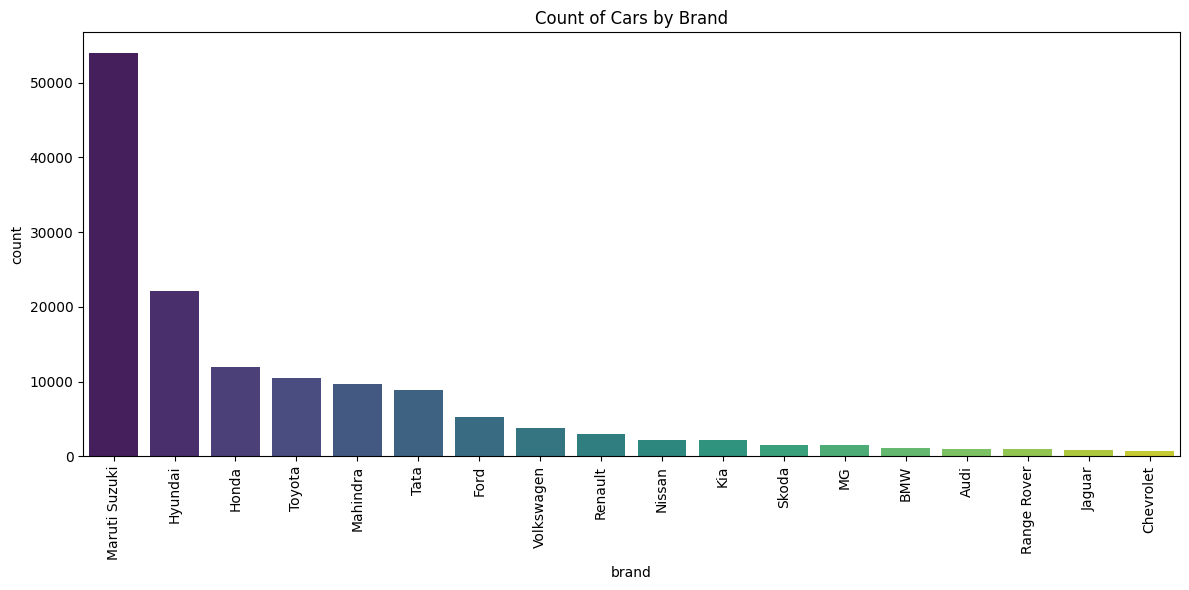

In [3]:
# Get the counts of each brand
brand_counts = df['brand'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('count')
plt.title('Count of Cars by Brand')
plt.tight_layout()
plt.show()

In [4]:
# Count occurrences of each car type
car_type_counts = df['car_type'].value_counts()
display(car_type_counts)

car_type
Hatchback    55890
Sedan        36897
SUV          35057
MPV           9702
Luxury        3358
Name: count, dtype: int64

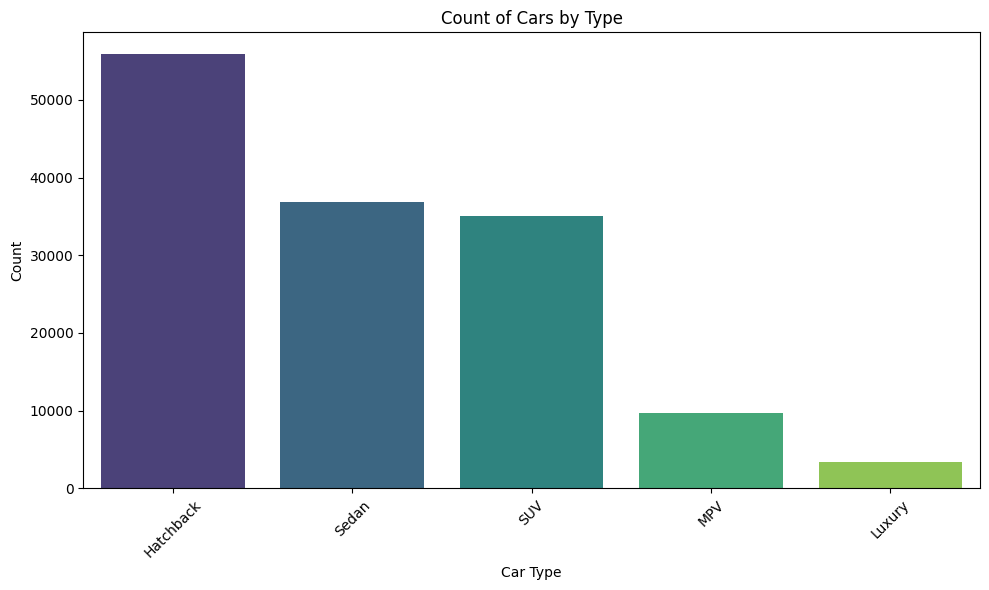

In [5]:
# Create a bar plot for car type counts
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.index, y=car_type_counts.values, hue=car_type_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Count of Cars by Type')
plt.tight_layout()
plt.show()

In [6]:
brand_dict = df.groupby('car_type')['brand'].unique().to_dict()

brand_counts = df.groupby(['car_type', 'brand']).size().reset_index(name='count')
print(brand_counts)

     car_type          brand  count
0   Hatchback      Chevrolet    292
1   Hatchback          Honda   2368
2   Hatchback        Hyundai   9557
3   Hatchback  Maruti Suzuki  35832
4   Hatchback         Nissan    552
5   Hatchback        Renault    799
6   Hatchback           Tata   3450
7   Hatchback         Toyota   2096
8   Hatchback     Volkswagen    944
9      Luxury           Audi    634
10     Luxury            BMW   1052
11     Luxury         Jaguar    290
12     Luxury             MG    476
13     Luxury    Range Rover    906
14        MPV      Chevrolet    154
15        MPV            Kia    684
16        MPV  Maruti Suzuki   6037
17        MPV        Renault    766
18        MPV         Toyota   2061
19        SUV           Ford   2605
20        SUV          Honda   2390
21        SUV        Hyundai   6303
22        SUV            Kia   1462
23        SUV             MG   1016
24        SUV       Mahindra   9618
25        SUV         Nissan   1089
26        SUV        Renault

<Figure size 1500x800 with 0 Axes>

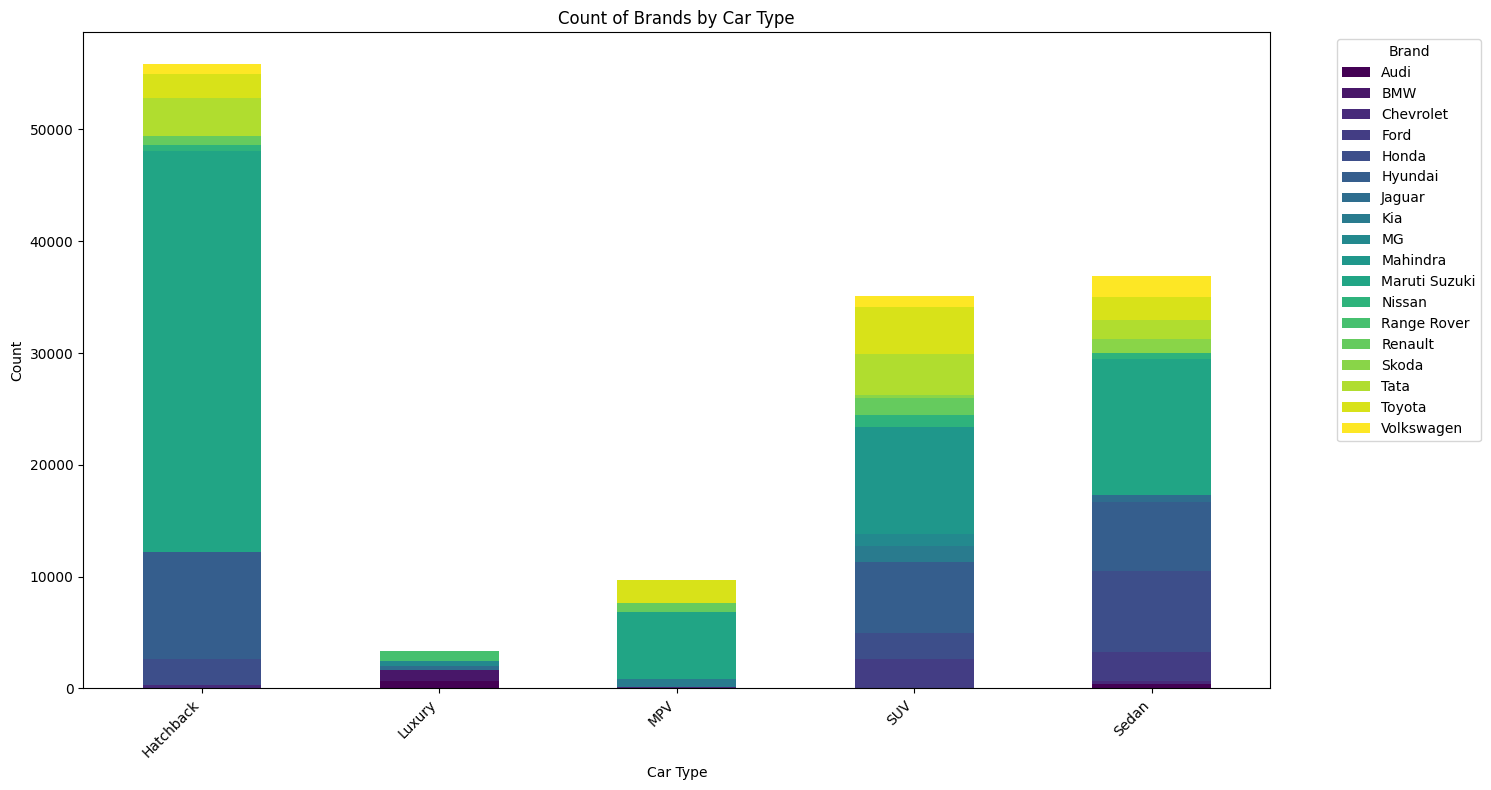

In [7]:
brand_car_type_pivot = brand_counts.pivot(index='car_type', columns='brand', values='count').fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(15, 8))
brand_car_type_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Count of Brands by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\SU20171413\AppData\Local\Temp\ipykernel_13784\1369537450.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_km_bin = df_sorted.groupby('kilometers_bins')['price'].mean().reset_index()


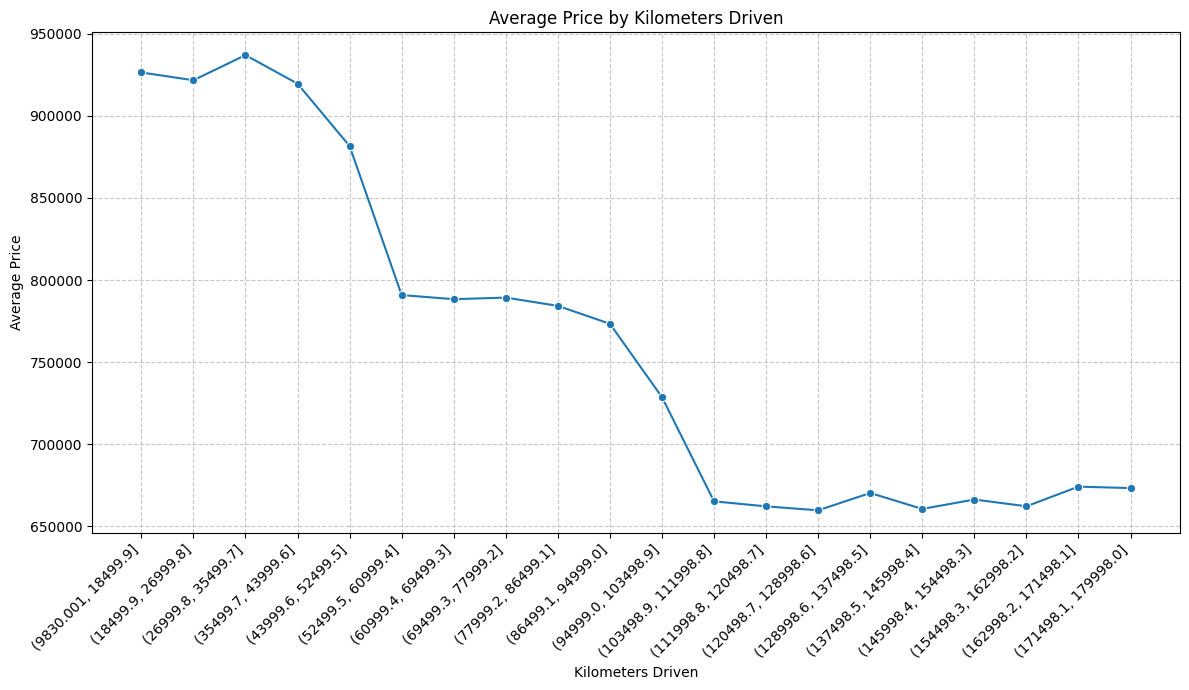

In [8]:
df_sorted = df.sort_values('kilometers')
df_sorted['kilometers_bins'] = pd.cut(df_sorted['kilometers'], bins=20, include_lowest=True)

average_price_by_km_bin = df_sorted.groupby('kilometers_bins')['price'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x=average_price_by_km_bin['kilometers_bins'].astype(str), y='price', data=average_price_by_km_bin, marker='o')
plt.title('Average Price by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\SU20171413\AppData\Local\Temp\ipykernel_13784\4244361877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='price', data=average_price_by_owner, palette='inferno')


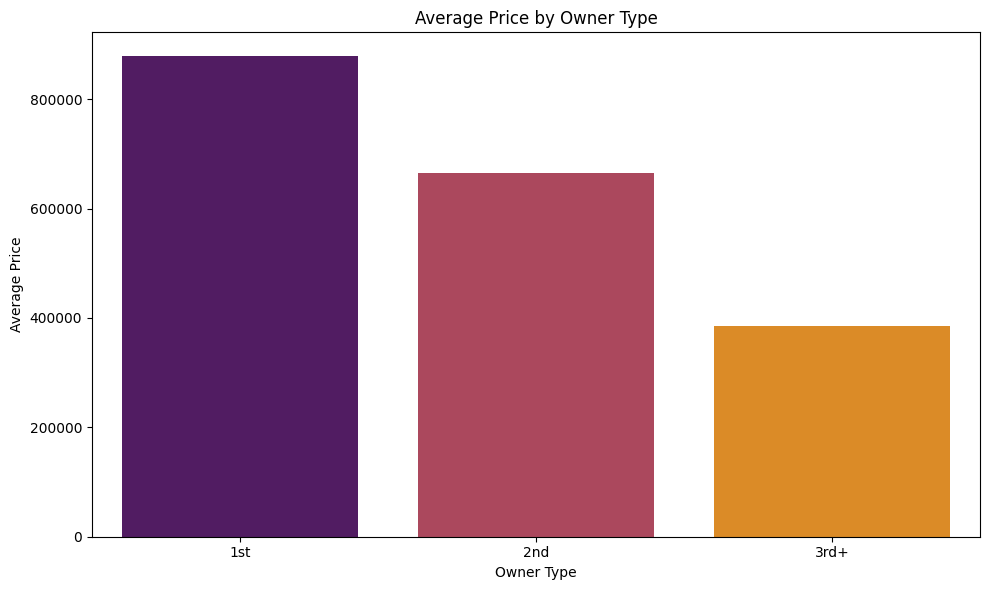

In [9]:
average_price_by_owner = df.groupby('owner')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='price', data=average_price_by_owner, palette='inferno')
plt.title('Average Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

C:\Users\SU20171413\AppData\Local\Temp\ipykernel_13784\575701449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='price', data=average_price_by_state, palette='crest')


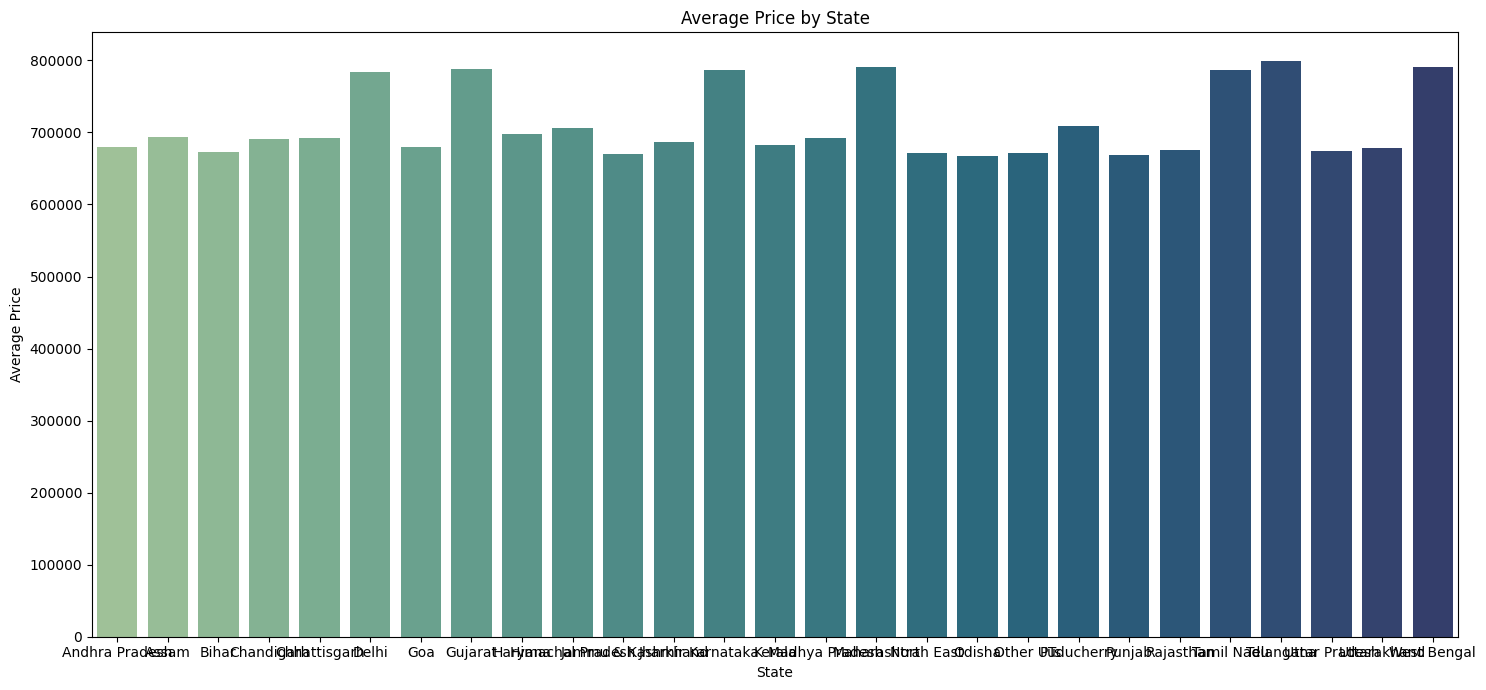

In [10]:
average_price_by_state = df.groupby('state')['price'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='price', data=average_price_by_state, palette='crest')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

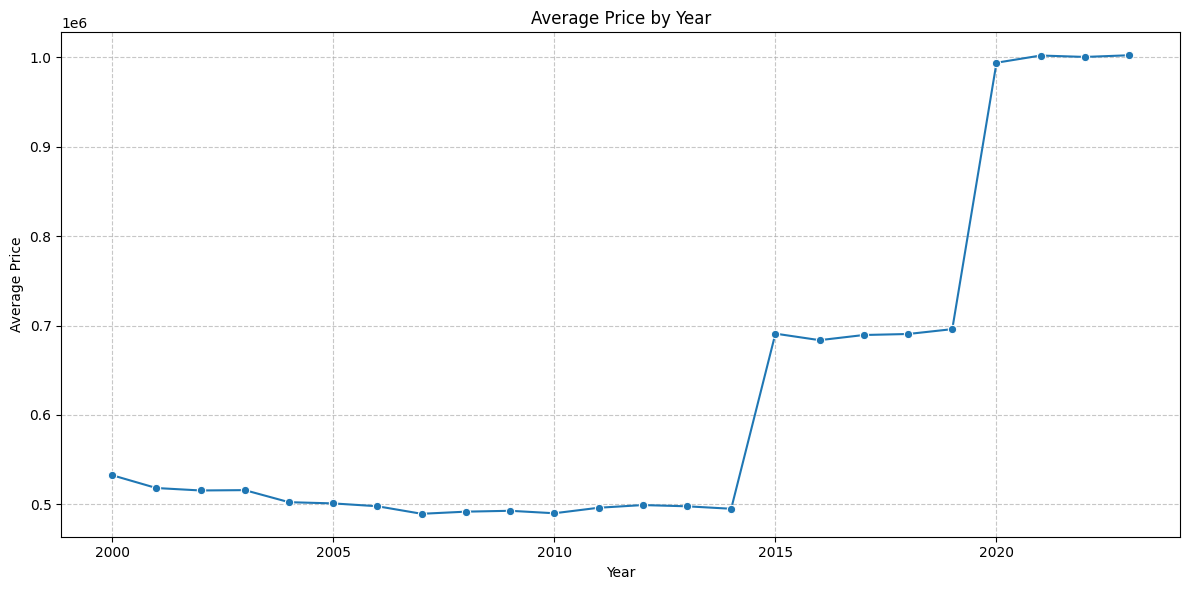

In [11]:
average_price_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=average_price_by_year, marker='o')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

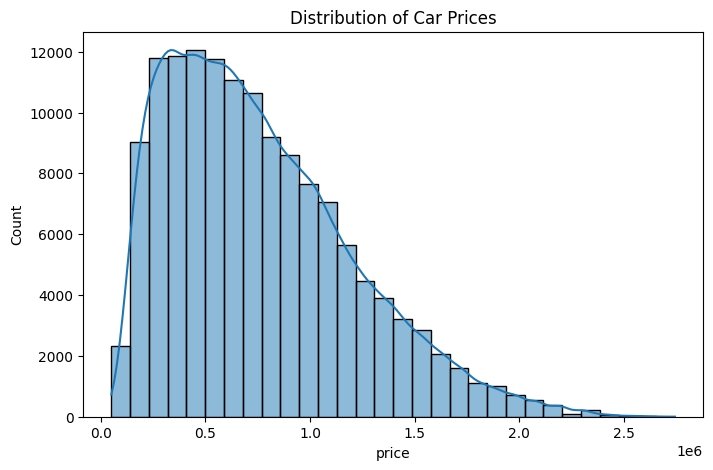

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

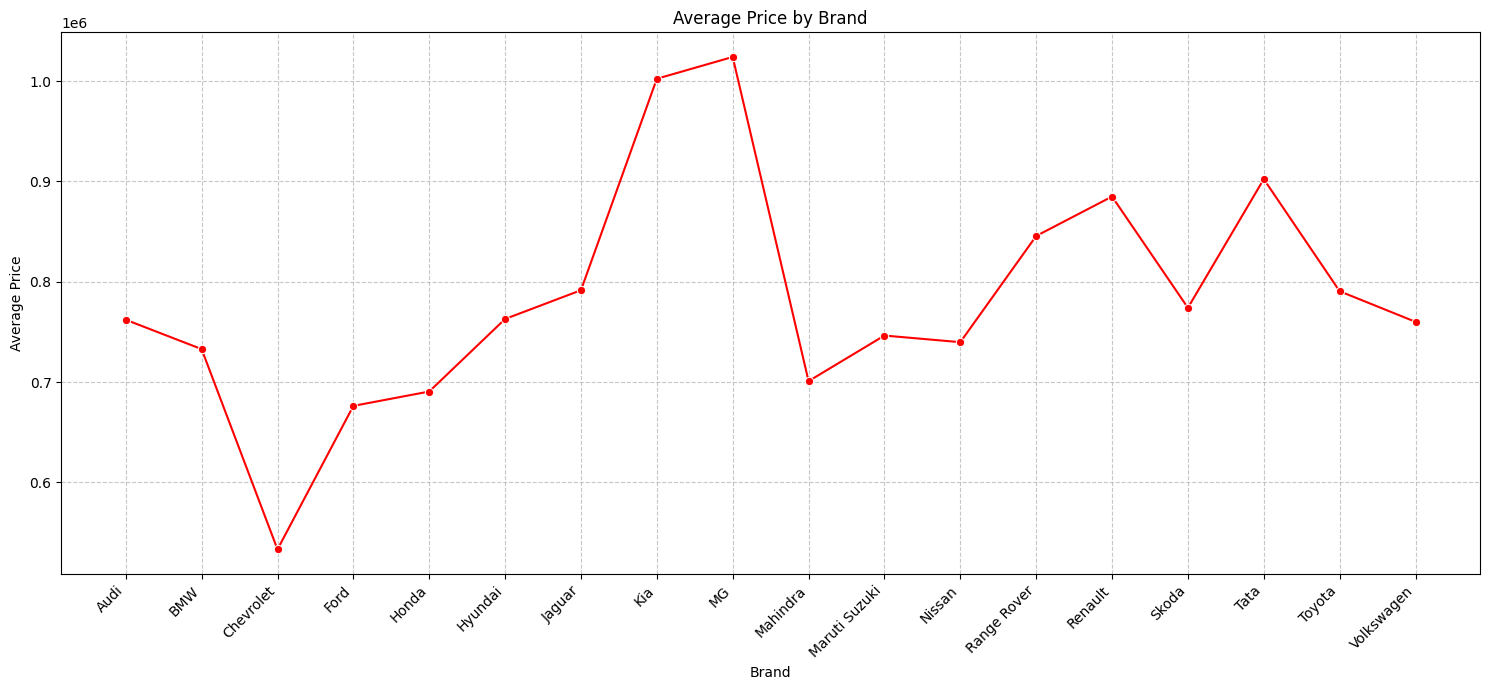

In [13]:
average_price_by_brand = df.groupby('brand')['price'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='brand', y='price', data=average_price_by_brand, marker='o', color='red')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

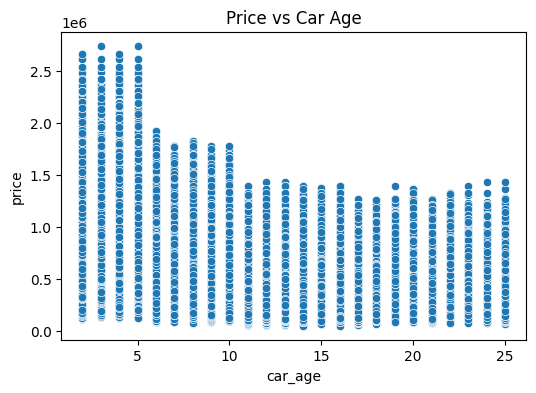

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='car_age', y='price', data=df)
plt.title("Price vs Car Age")
plt.show()

C:\Users\SU20171413\AppData\Local\Temp\ipykernel_13784\770511894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', palette='viridis', data=df)


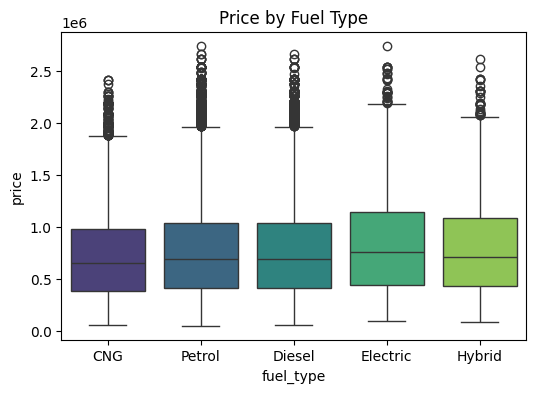

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='fuel_type', y='price', palette='viridis', data=df)
plt.title("Price by Fuel Type")
plt.show()

In [16]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Add outlier column: 1 if outlier, 0 otherwise
df['Price_Outlier'] = ((df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)).astype(int)

# View the first few rows
outliers_only = df[df['Price_Outlier'] == 1]
print(outliers_only)


                brand model_name model_variant   car_type transmission  \
36                BMW   5 Series         Sport     Luxury       Manual   
38      Maruti Suzuki     Baleno            ZX  Hatchback       Manual   
47            Hyundai      Creta          Asta        SUV    Automatic   
182     Maruti Suzuki     Baleno             Z  Hatchback       Manual   
231     Maruti Suzuki    Celerio             Z  Hatchback    Automatic   
...               ...        ...           ...        ...          ...   
140384  Maruti Suzuki     Baleno             L  Hatchback    Automatic   
140414        Renault      Kiger           RXT        SUV       Manual   
140450  Maruti Suzuki      Ignis            ZX  Hatchback       Manual   
140708  Maruti Suzuki    Celerio            ZX  Hatchback       Manual   
140729        Renault      Kiger           RXT        SUV    Automatic   

       fuel_type  year  kilometers owner           state accidental  \
36        Petrol  2020     31389.0   1st

In [17]:
# Count of outliers
outlier_count = df['Price_Outlier'].sum()
print(f"Total Price outliers: {outlier_count}")

# List the Price values of outliers
outlier_prices = df.loc[df['Price_Outlier'] == 1, 'price']
print("Prices of outliers:")
print(outlier_prices)

Total Price outliers: 1820
Prices of outliers:
36        2299000.0
38        2019600.0
47        2096325.0
182       2194500.0
231       2032800.0
            ...    
140384    1974720.0
140414    2194500.0
140450    2052000.0
140708    2138400.0
140729    2159850.0
Name: price, Length: 1820, dtype: float64


In [18]:
# Remove Price outliers
df_clean = df[df['Price_Outlier'] == 0].copy()

# Reset index (optional)
df_clean.reset_index(drop=True, inplace=True)

# Check the cleaned dataframe
print(df_clean.head())
print(f"Original rows: {len(df)}, After removing outliers: {len(df_clean)}")
df = df_clean

           brand model_name model_variant   car_type transmission fuel_type  \
0       Mahindra     TUV300           AX5        SUV       Manual       CNG   
1          Skoda      Rapid         Style      Sedan       Manual    Petrol   
2  Maruti Suzuki       Alto             Z  Hatchback       Manual    Diesel   
3        Hyundai  Grand i10         Magna  Hatchback       Manual    Diesel   
4       Mahindra     XUV500            W8        SUV       Manual    Petrol   

   year  kilometers owner           state accidental     price  car_age  \
0  2017    164654.0   1st       Rajasthan         No  547253.0        8   
1  2018     41351.0   1st     Maharashtra         No  512050.0        7   
2  2002    119090.0  3rd+      Tamil Nadu         No  678923.0       23   
3  2013     19979.0   1st  Andhra Pradesh         No  522500.0       12   
4  2011    130591.0  3rd+           Bihar         No  401182.0       14   

   price_per_km  Price_Outlier  
0      3.323654              0  
1     12

C:\Users\SU20171413\AppData\Local\Temp\ipykernel_13784\4073498231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='car_type', y='price', data=df, palette='viridis')


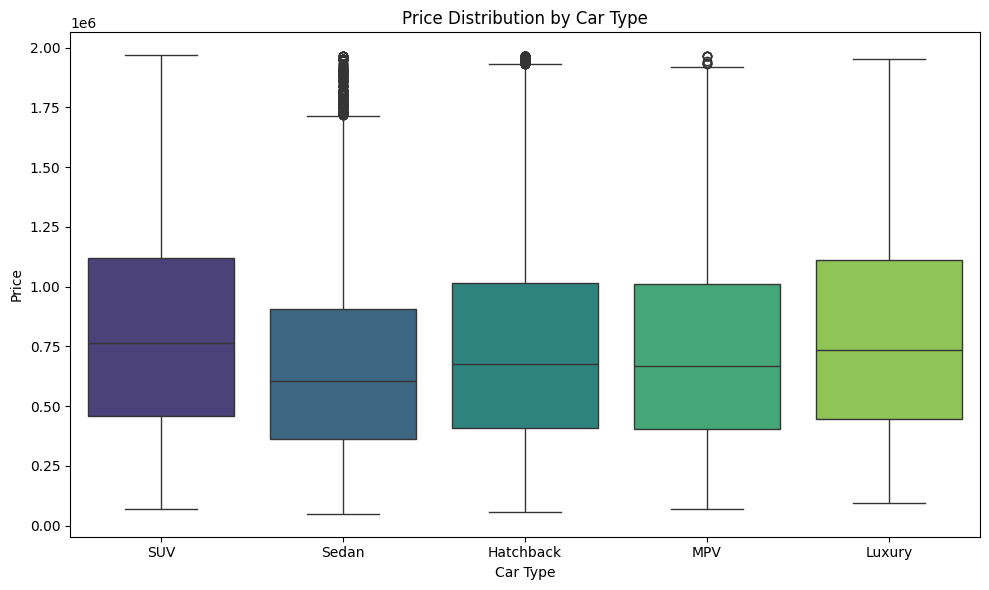

In [19]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='car_type', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

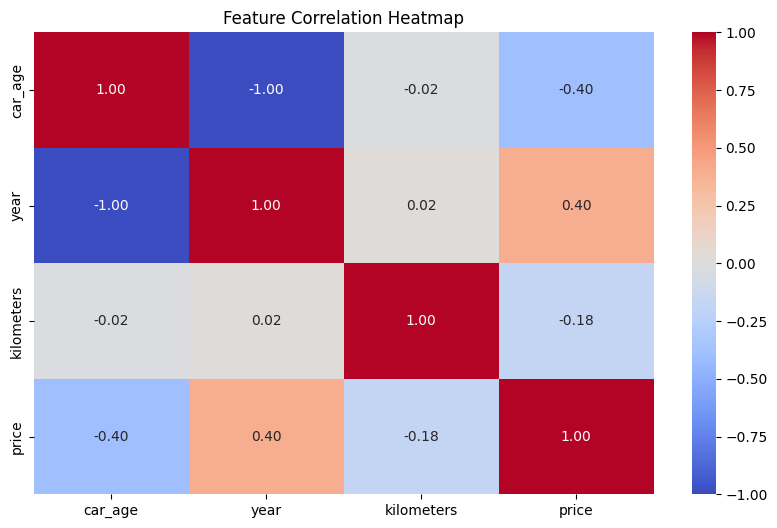

In [20]:
cols = ['car_age', 'year', 'kilometers', 'owner',
        'accidental', 'transmission', 'fuel_type', 'price']

df_corr = df[cols].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age,price_per_km,Price_Outlier
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8,3.323654,0
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7,12.383014,0
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23,5.700924,0
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12,26.152460,0
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14,3.072049,0


In [22]:
df = df.drop("Price_Outlier", axis=1)
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age,price_per_km
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8,3.323654
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7,12.383014
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23,5.700924
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12,26.152460
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14,3.072049


In [23]:
# Save DataFrame to CSV
df.to_csv("..\\..\\data\\intermediate\\secondCarDataset.csv", index=False)